In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [16]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 6)

In [17]:
df = pd.read_csv("../Data/Processed/feature_engineered.csv")

In [18]:
df['date'] = pd.to_datetime(df['date'])
df['is_holiday'] = df['holiday'] == 1

In [19]:
df.head()

,date,cpu_mean,cpu_tot,cpu_std,storage_mean,storage_tot,storage_std,users_mean,users_tot,users_std,...,cloud_market_demand,holiday,unique_regions,total_records,cpu,storage,users,active_regions,resources_per_region,is_holiday
0,2023-01-01,74.92,899,14.44,1509.00,18108,426.24,387.00,4644,93.94,...,0.99,1,4,12,"{'min': {'value': 51.0, 'region': 'north europ...","{'min': {'value': 621.0, 'region': 'east us', ...","{'min': {'value': 221.0, 'region': 'north euro...",['east us' 'west us' 'north europe' 'southeast...,"{'east us': ['vm', 'storage', 'container'], 'n...",True
1,2023-01-02,75.17,902,20.58,1286.83,15442,434.09,318.33,3820,98.52,...,1.15,0,4,12,"{'min': {'value': 51.0, 'region': 'north europ...","{'min': {'value': 534.0, 'region': 'north euro...","{'min': {'value': 201.0, 'region': 'southeast ...",['east us' 'west us' 'north europe' 'southeast...,"{'east us': ['vm', 'storage', 'container'], 'n...",False
2,2023-01-03,76.50,918,12.20,1147.75,13773,474.97,373.58,4483,82.26,...,0.98,0,4,12,"{'min': {'value': 57.0, 'region': 'east us', '...","{'min': {'value': 564.0, 'region': 'north euro...","{'min': {'value': 208.0, 'region': 'north euro...",['east us' 'west us' 'north europe' 'southeast...,"{'east us': ['vm', 'storage', 'container'], 'n...",False
3,2023-01-04,72.08,865,16.55,1126.92,13523,295.51,327.17,3926,93.44,...,1.08,0,4,12,"{'min': {'value': 50.0, 'region': 'north europ...","{'min': {'value': 634.0, 'region': 'east us', ...","{'min': {'value': 214.0, 'region': 'southeast ...",['east us' 'west us' 'north europe' 'southeast...,"{'east us': ['vm', 'storage', 'container'], 'n...",False
4,2023-01-05,76.50,918,14.43,1580.50,18966,357.88,370.08,4441,78.45,...,1.05,0,4,12,"{'min': {'value': 56.0, 'region': 'west us', '...","{'min': {'value': 984.0, 'region': 'east us', ...","{'min': {'value': 228.0, 'region': 'east us', ...",['east us' 'west us' 'north europe' 'southeast...,"{'east us': ['vm', 'storage', 'container'], 'n...",False


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  90 non-null     datetime64[ns]
 1   cpu_mean              90 non-null     float64       
 2   cpu_tot               90 non-null     int64         
 3   cpu_std               90 non-null     float64       
 4   storage_mean          90 non-null     float64       
 5   storage_tot           90 non-null     int64         
 6   storage_std           90 non-null     float64       
 7   users_mean            90 non-null     float64       
 8   users_tot             90 non-null     int64         
 9   users_std             90 non-null     float64       
 10  economic_index        90 non-null     float64       
 11  cloud_market_demand   90 non-null     float64       
 12  holiday               90 non-null     int64         
 13  unique_regions        

In [21]:
df.describe()

,date,cpu_mean,cpu_tot,cpu_std,storage_mean,storage_tot,storage_std,users_mean,users_tot,users_std,economic_index,cloud_market_demand,holiday,unique_regions,total_records
count,90,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.0
mean,2023-02-14 12:00:00,74.651778,895.822222,14.406444,1242.478000,14909.733333,427.384889,352.694444,4232.333333,85.336444,98.930444,1.006667,0.277778,4.0,12.0
min,2023-01-01 00:00:00,67.080000,805.000000,7.830000,948.830000,11386.000000,273.500000,281.170000,3374.000000,51.810000,73.800000,0.800000,0.000000,4.0,12.0
25%,2023-01-23 06:00:00,71.602500,859.250000,12.737500,1149.000000,13788.000000,387.967500,335.670000,4028.000000,77.555000,93.035000,0.940000,0.000000,4.0,12.0
50%,2023-02-14 12:00:00,74.250000,891.000000,14.550000,1245.585000,14947.000000,426.975000,355.875000,4270.500000,86.795000,99.645000,1.015000,0.000000,4.0,12.0
75%,2023-03-08 18:00:00,76.560000,918.750000,16.035000,1310.565000,15726.750000,472.277500,371.832500,4462.000000,94.127500,103.567500,1.077500,1.000000,4.0,12.0
max,2023-03-31 00:00:00,85.170000,1022.000000,20.580000,1580.500000,18966.000000,570.170000,420.170000,5042.000000,110.440000,118.860000,1.270000,1.000000,4.0,12.0
std,NaN,4.150353,49.802887,2.153797,125.980702,1511.764835,63.923848,25.113493,301.368377,12.348476,8.825072,0.101517,0.450412,0.0,0.0


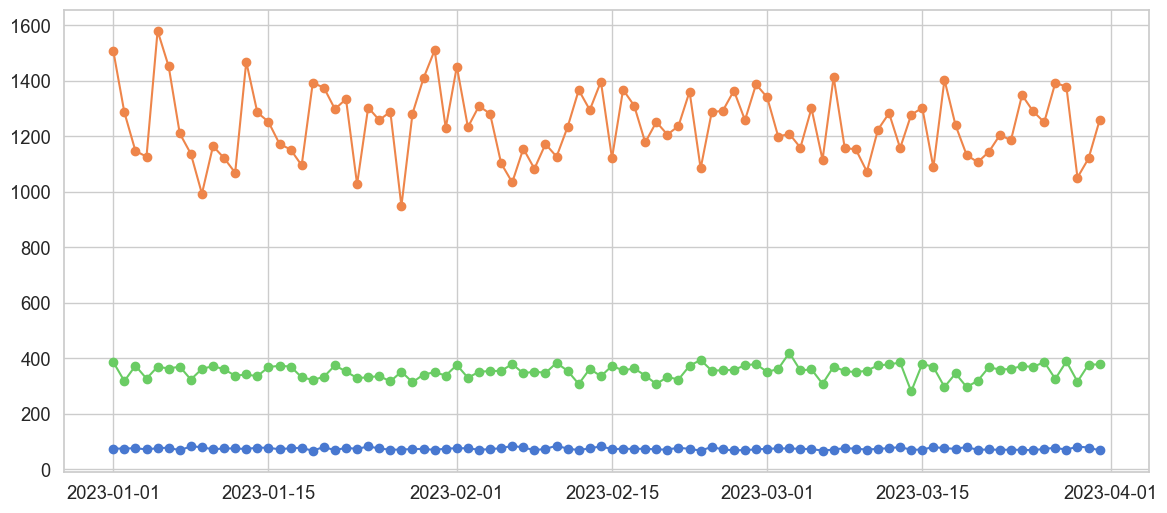

In [22]:
metrics = ['cpu_mean', 'storage_mean', 'users_mean']

plt.figure(figsize=(14,6))
for metric in metrics:
    plt.plot(df['date'], df[metric], label=metric, marker='o')

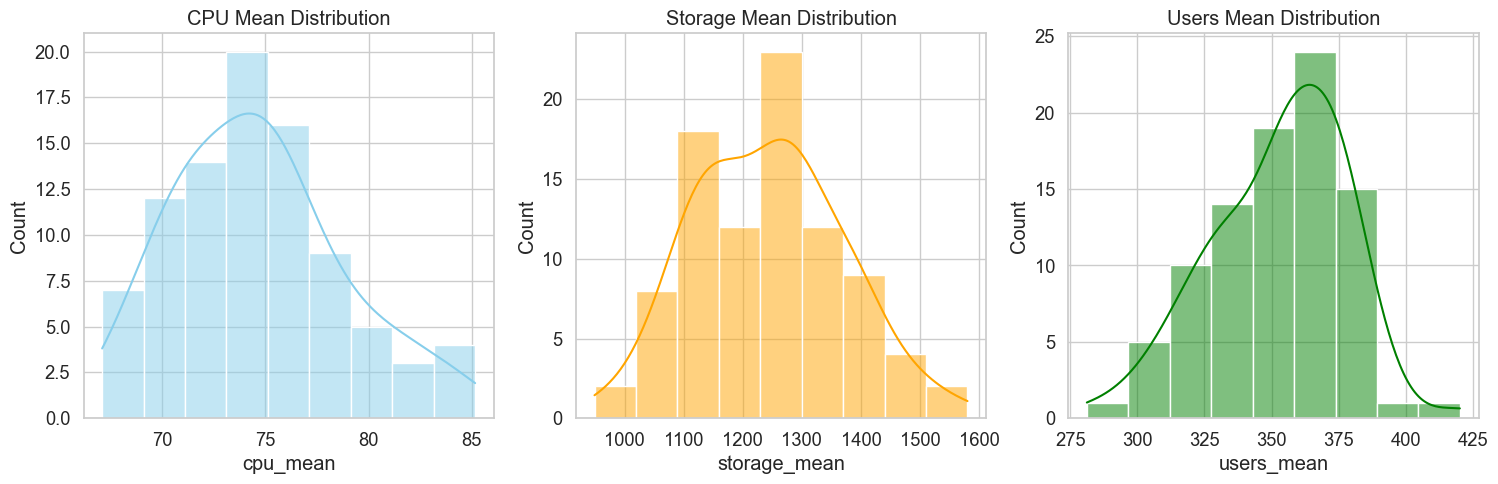

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(df['cpu_mean'], kde=True, ax=axes[0], color='skyblue').set_title("CPU Mean Distribution")
sns.histplot(df['storage_mean'], kde=True, ax=axes[1], color='orange').set_title("Storage Mean Distribution")
sns.histplot(df['users_mean'], kde=True, ax=axes[2], color='green').set_title("Users Mean Distribution")
plt.show()

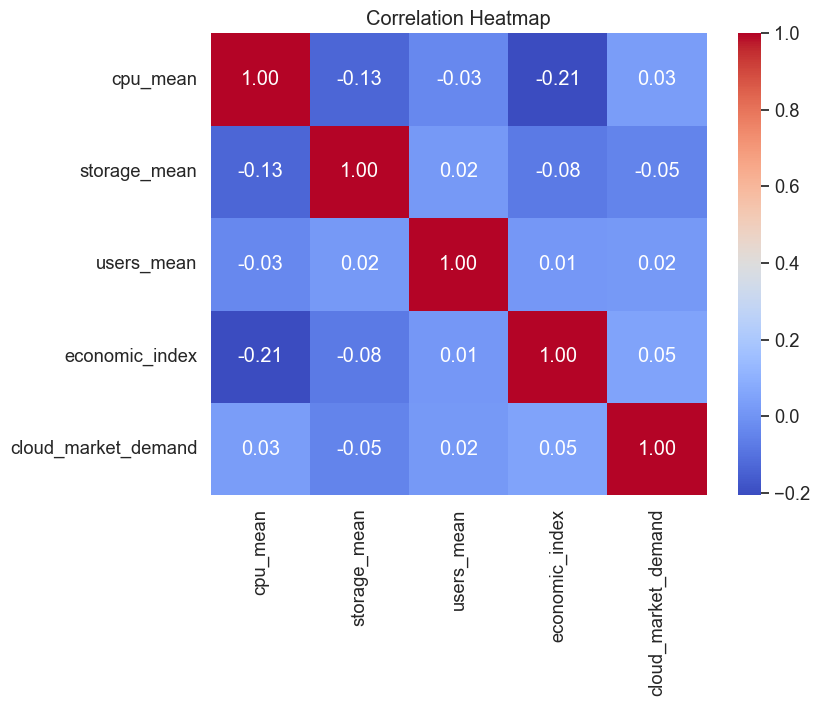

In [24]:
correlation = df[['cpu_mean','storage_mean','users_mean','economic_index','cloud_market_demand']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

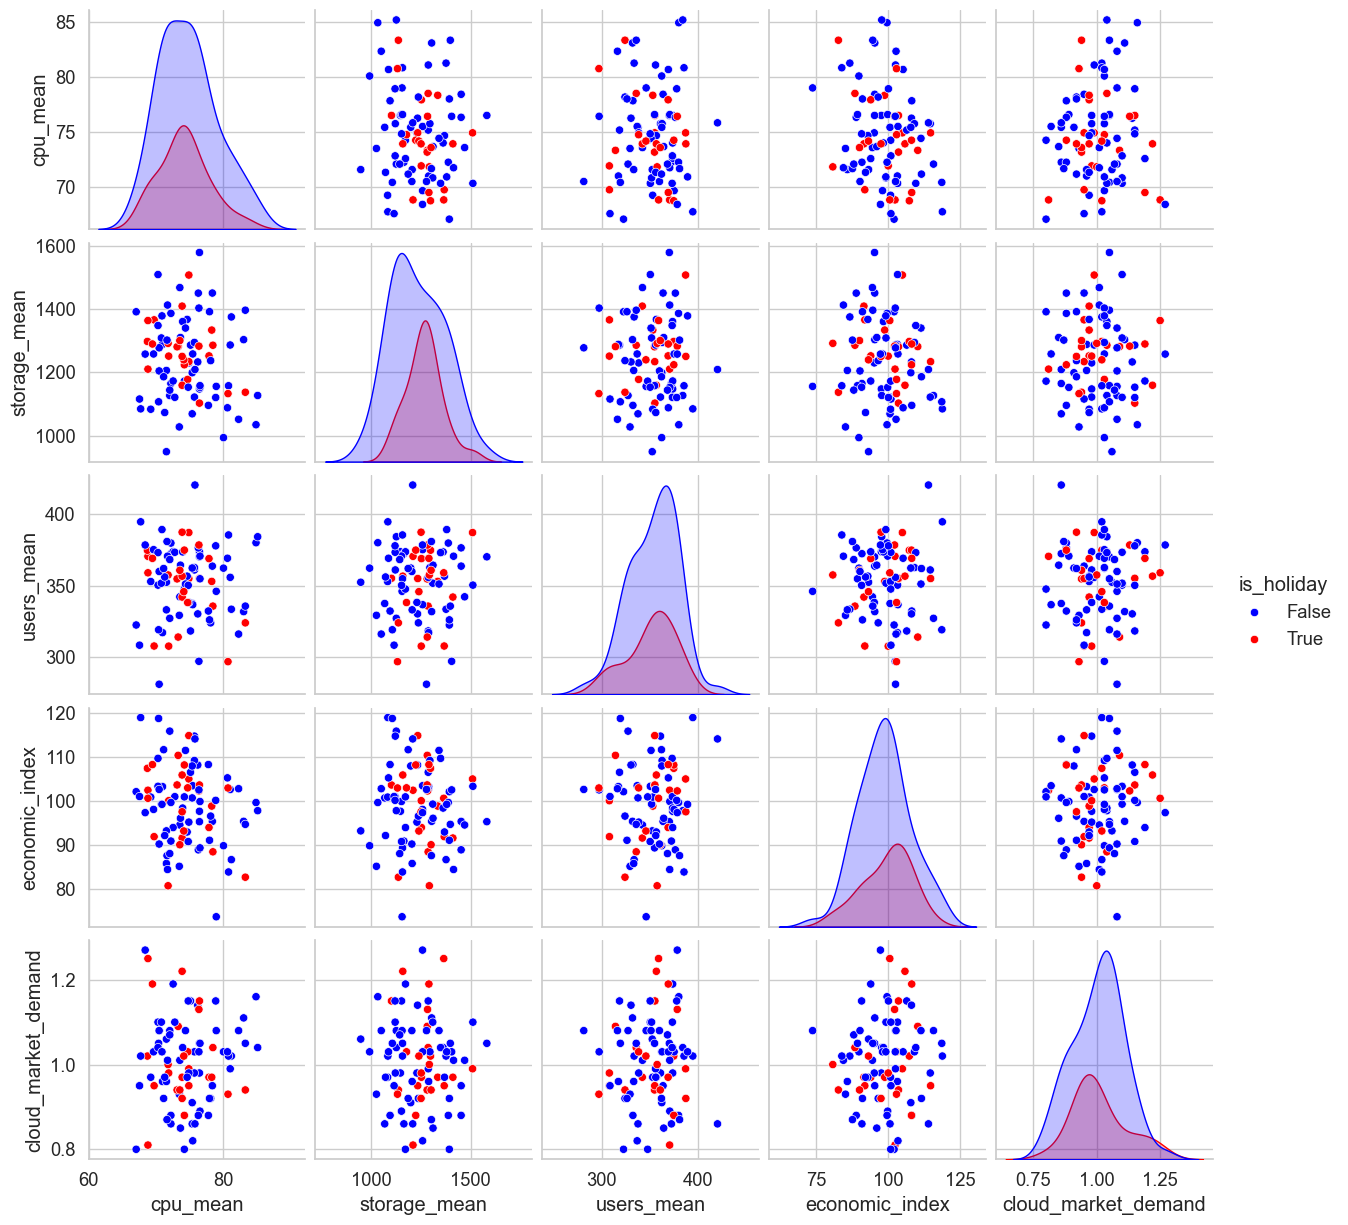

In [25]:

df['is_holiday'] = df['holiday'] == 1

sns.pairplot(
    df[['cpu_mean','storage_mean','users_mean','economic_index','cloud_market_demand','is_holiday']],
    hue='is_holiday',
    palette={True:'red', False:'blue'}
)
plt.show()


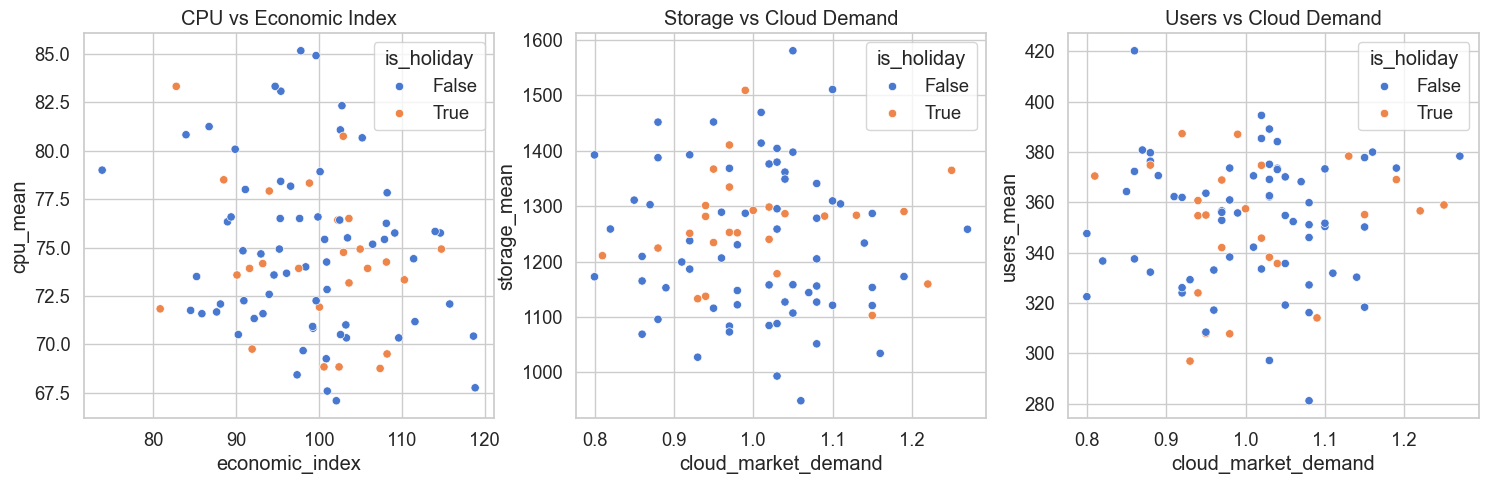

In [26]:
fig, axes = plt.subplots(1,3,figsize=(18,5))
sns.scatterplot(data=df, x='economic_index', y='cpu_mean', hue='is_holiday', ax=axes[0])
sns.scatterplot(data=df, x='cloud_market_demand', y='storage_mean', hue='is_holiday', ax=axes[1])
sns.scatterplot(data=df, x='cloud_market_demand', y='users_mean', hue='is_holiday', ax=axes[2])
axes[0].set_title("CPU vs Economic Index")
axes[1].set_title("Storage vs Cloud Demand")
axes[2].set_title("Users vs Cloud Demand")
plt.show()

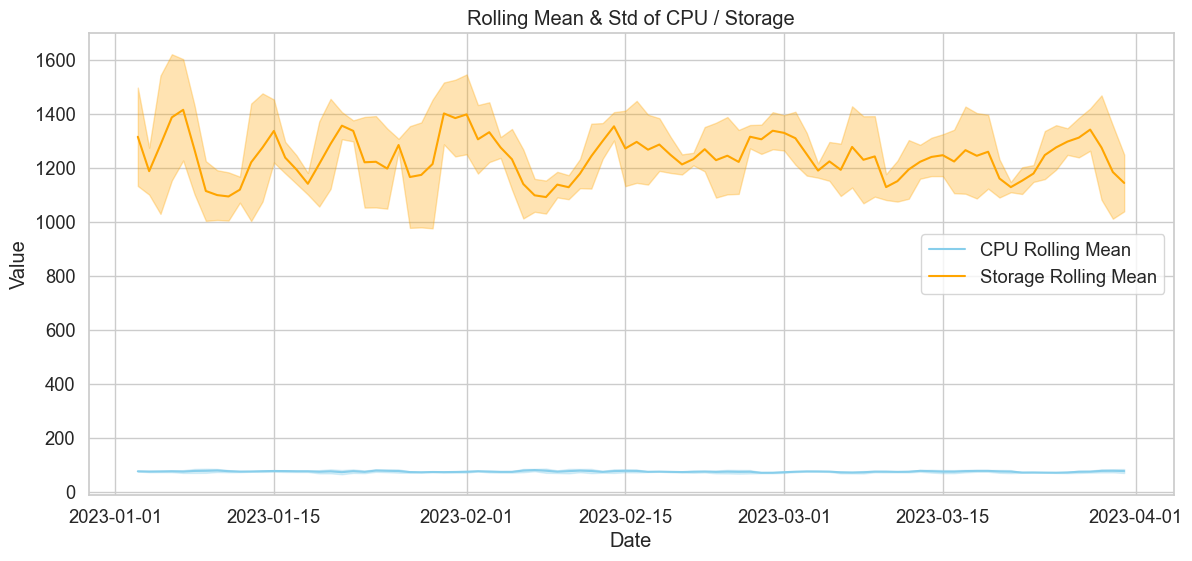

In [27]:
window = 3 

df['cpu_mean_roll'] = df['cpu_mean'].rolling(window).mean()
df['cpu_std_roll'] = df['cpu_mean'].rolling(window).std()
df['storage_mean_roll'] = df['storage_mean'].rolling(window).mean()
df['storage_std_roll'] = df['storage_mean'].rolling(window).std()

plt.figure(figsize=(14,6))
plt.plot(df['date'], df['cpu_mean_roll'], label='CPU Rolling Mean', color='skyblue')
plt.fill_between(df['date'], df['cpu_mean_roll']-df['cpu_std_roll'], df['cpu_mean_roll']+df['cpu_std_roll'], color='skyblue', alpha=0.3)
plt.plot(df['date'], df['storage_mean_roll'], label='Storage Rolling Mean', color='orange')
plt.fill_between(df['date'], df['storage_mean_roll']-df['storage_std_roll'], df['storage_mean_roll']+df['storage_std_roll'], color='orange', alpha=0.3)
plt.title("Rolling Mean & Std of CPU / Storage")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

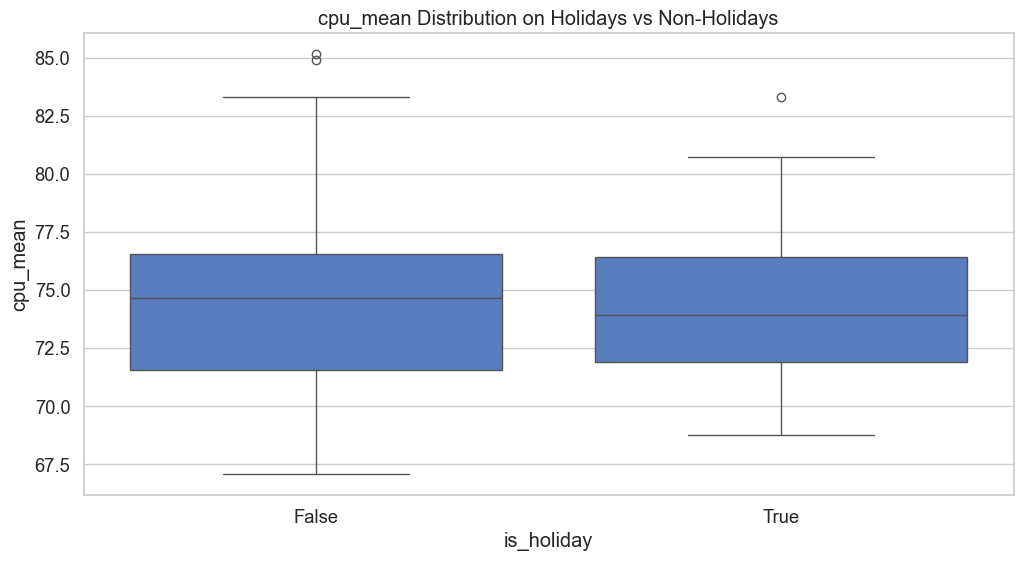

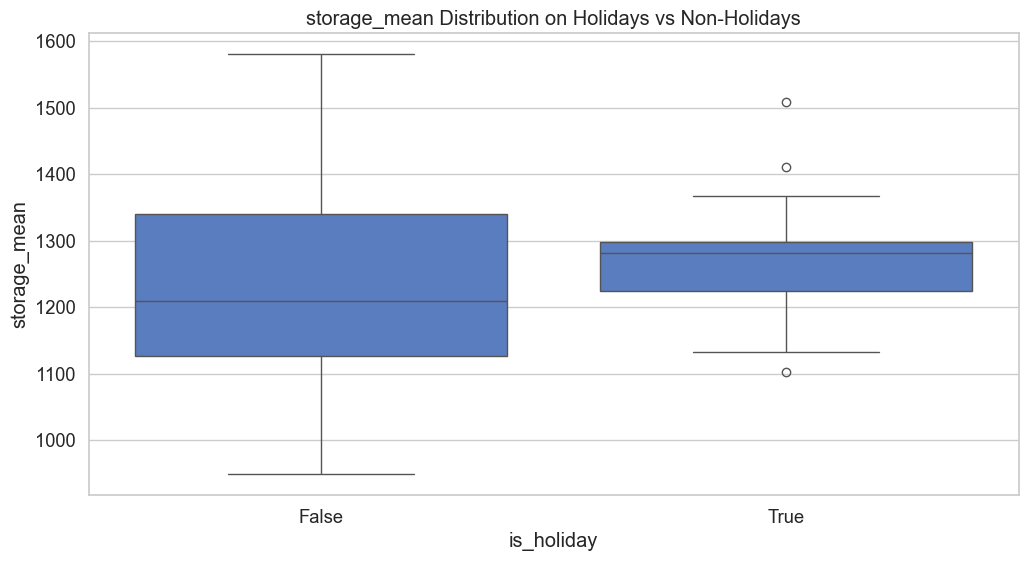

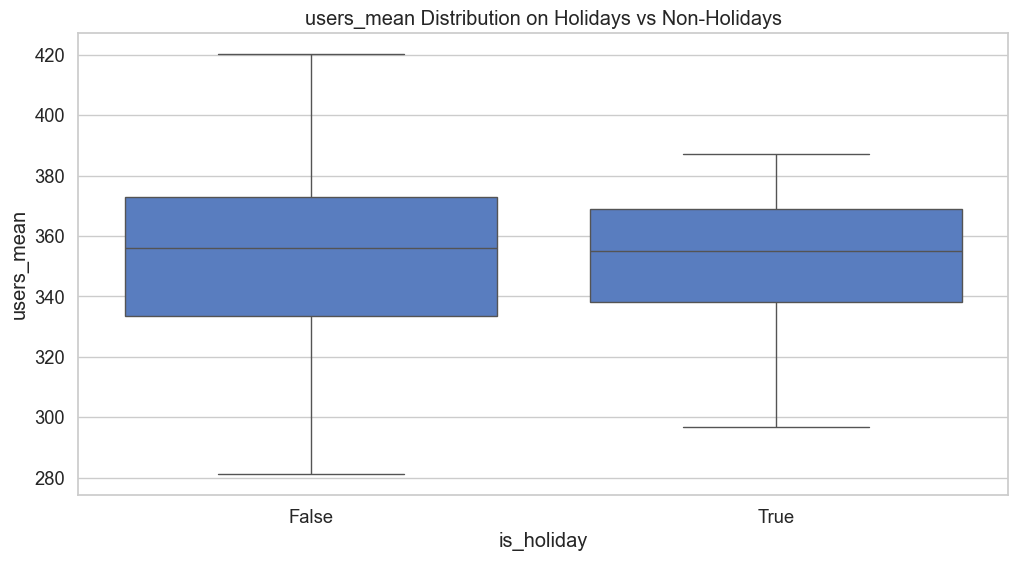

In [28]:
metrics = ['cpu_mean','storage_mean','users_mean']
for metric in metrics:
    sns.boxplot(x='is_holiday', y=metric, data=df)
    plt.title(f"{metric} Distribution on Holidays vs Non-Holidays")
    plt.show()

In [29]:
df['resources_per_region'] = df['resources_per_region'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Count resources
resource_counts = {}
for index, row in df.iterrows():
    for region, resources in row['resources_per_region'].items():
        if region not in resource_counts:
            resource_counts[region] = {}
        for r in resources:
            resource_counts[region][r] = resource_counts[region].get(r, 0) + 1

resource_counts_df = pd.DataFrame(resource_counts)
resource_counts_df

,east us,north europe,southeast asia,west us
vm,90,90,90,90
storage,90,90,90,90
container,90,90,90,90


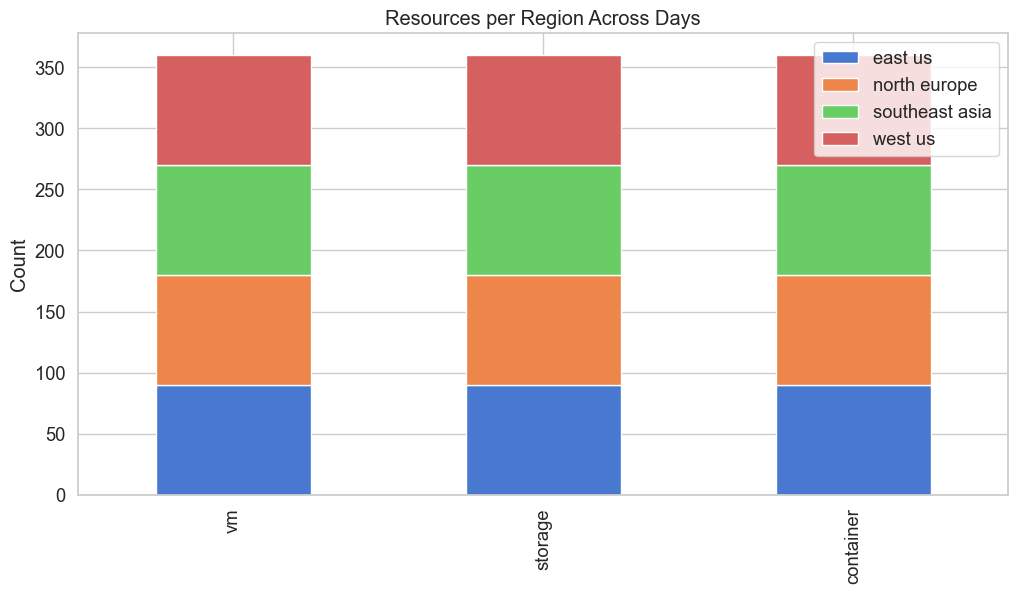

In [30]:
resource_counts_df.plot(kind='bar', stacked=True)
plt.title("Resources per Region Across Days")
plt.ylabel("Count")
plt.show()